## 1.Imports

In [94]:
from pyspark.sql import functions as F
from pyspark.sql.types import StringType, NumericType
from pyspark.sql import DataFrame
from pyspark.sql import functions as F
from pyspark.sql.types import StringType, NumericType
from pyspark.sql import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


## 2. Spark session

In [ ]:
spark = (
    SparkSession.builder
        .appName("COVID_Xray_Analysis") 
        .master("local[*]")
        .config("spark.sql.shuffle.partitions", "8") 
        .getOrCreate()
)

In [10]:
spark

In [13]:
data_path = "../data/metadata.csv"

df = spark.read.csv(
    data_path,
    header=True,      # первая строка — заголовки
    inferSchema=True  # пусть Spark попытается угадать типы
)

In [14]:
df.printSchema()

root
 |-- patientid: string (nullable = true)
 |-- offset: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- finding: string (nullable = true)
 |-- RT_PCR_positive: string (nullable = true)
 |-- survival: string (nullable = true)
 |-- intubated: string (nullable = true)
 |-- intubation_present: string (nullable = true)
 |-- went_icu: string (nullable = true)
 |-- in_icu: string (nullable = true)
 |-- needed_supplemental_O2: string (nullable = true)
 |-- extubated: string (nullable = true)
 |-- temperature: double (nullable = true)
 |-- pO2_saturation: double (nullable = true)
 |-- leukocyte_count: double (nullable = true)
 |-- neutrophil_count: double (nullable = true)
 |-- lymphocyte_count: double (nullable = true)
 |-- view: string (nullable = true)
 |-- modality: string (nullable = true)
 |-- date: string (nullable = true)
 |-- location: string (nullable = true)
 |-- folder: string (nullable = true)
 |-- filename: string (nullable 

In [9]:
df.show(3)

+---------+------+---+---+--------------------+---------------+--------+---------+------------------+--------+------+----------------------+---------+-----------+--------------+---------------+----------------+----------------+----+--------+----------------+--------------------+------+--------------------+--------------------+--------------------+-------+--------------------+-----------+----+
|patientid|offset|sex|age|             finding|RT_PCR_positive|survival|intubated|intubation_present|went_icu|in_icu|needed_supplemental_O2|extubated|temperature|pO2_saturation|leukocyte_count|neutrophil_count|lymphocyte_count|view|modality|            date|            location|folder|            filename|                 doi|                 url|license|      clinical_notes|other_notes|_c29|
+---------+------+---+---+--------------------+---------------+--------+---------+------------------+--------+------+----------------------+---------+-----------+--------------+---------------+---------------

25/11/29 14:13:58 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: patientid, offset, sex, age, finding, RT_PCR_positive, survival, intubated, intubation_present, went_icu, in_icu, needed_supplemental_O2, extubated, temperature, pO2_saturation, leukocyte_count, neutrophil_count, lymphocyte_count, view, modality, date, location, folder, filename, doi, url, license, clinical_notes, other_notes, 
 Schema: patientid, offset, sex, age, finding, RT_PCR_positive, survival, intubated, intubation_present, went_icu, in_icu, needed_supplemental_O2, extubated, temperature, pO2_saturation, leukocyte_count, neutrophil_count, lymphocyte_count, view, modality, date, location, folder, filename, doi, url, license, clinical_notes, other_notes, _c29
Expected: _c29 but found: 
CSV file: file:///home/administrator/Desktop/IDE/Spark/data/metadata.csv


In [4]:
# Количество строк и столбцов
row_count = df.count()
col_count = len(df.columns)
print(f"Rows: {row_count}, Columns: {col_count}")

# Список столбцов
print(df.columns)

Rows: 950, Columns: 30
['patientid', 'offset', 'sex', 'age', 'finding', 'RT_PCR_positive', 'survival', 'intubated', 'intubation_present', 'went_icu', 'in_icu', 'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation', 'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view', 'modality', 'date', 'location', 'folder', 'filename', 'doi', 'url', 'license', 'clinical_notes', 'other_notes', '_c29']


In [5]:
null_counts = df.select([
    F.count(F.when(F.col(c).isNull() | (F.col(c) == ""), c)).alias(c)
    for c in df.columns
])

null_counts.show(truncate=False)

25/11/28 09:41:14 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: patientid, offset, sex, age, finding, RT_PCR_positive, survival, intubated, intubation_present, went_icu, in_icu, needed_supplemental_O2, extubated, temperature, pO2_saturation, leukocyte_count, neutrophil_count, lymphocyte_count, view, modality, date, location, folder, filename, doi, url, license, clinical_notes, other_notes, 
 Schema: patientid, offset, sex, age, finding, RT_PCR_positive, survival, intubated, intubation_present, went_icu, in_icu, needed_supplemental_O2, extubated, temperature, pO2_saturation, leukocyte_count, neutrophil_count, lymphocyte_count, view, modality, date, location, folder, filename, doi, url, license, clinical_notes, other_notes, _c29
Expected: _c29 but found: 
CSV file: file:///home/administrator/Desktop/IDE/Spark/data/metadata.csv


+---------+------+---+---+-------+---------------+--------+---------+------------------+--------+------+----------------------+---------+-----------+--------------+---------------+----------------+----------------+----+--------+----+--------+------+--------+---+---+-------+--------------+-----------+----+
|patientid|offset|sex|age|finding|RT_PCR_positive|survival|intubated|intubation_present|went_icu|in_icu|needed_supplemental_O2|extubated|temperature|pO2_saturation|leukocyte_count|neutrophil_count|lymphocyte_count|view|modality|date|location|folder|filename|doi|url|license|clinical_notes|other_notes|_c29|
+---------+------+---+---+-------+---------------+--------+---------+------------------+--------+------+----------------------+---------+-----------+--------------+---------------+----------------+----------------+----+--------+----+--------+------+--------+---+---+-------+--------------+-----------+----+
|0        |253   |80 |237|0      |357            |589     |702      |700       

## 3. Распределение пропусков по всем полям

In [45]:
def missing_report(df):
    total_rows = df.count()
    stats = []

    for col in df.columns:
        # считаем NULL и пустые строки как пропуски
        missing = df.filter(
            F.col(col).isNull() | (F.trim(F.col(col)) == "")
        ).count()
        percent = (missing / total_rows) * 100 if total_rows > 0 else 0

        stats.append({
            "Column": col,
            "MissingCount": missing,
            "MissingPercent": round(percent, 2)  # <-- округление
        })

    pdf = (
        pd.DataFrame(stats)
        .set_index("Column")
        .sort_values(by="MissingPercent", ascending=False)
    )
    return pdf

In [46]:
missing_df_raw = missing_report(df)

In [47]:
missing_df_raw

,MissingCount,MissingPercent
Column,,
leukocyte_count,934,98.32
neutrophil_count,922,97.05
extubated,913,96.11
lymphocyte_count,910,95.79
temperature,872,91.79
needed_supplemental_O2,860,90.53
pO2_saturation,831,87.47
intubated,702,73.89
intubation_present,700,73.68


## Visualization

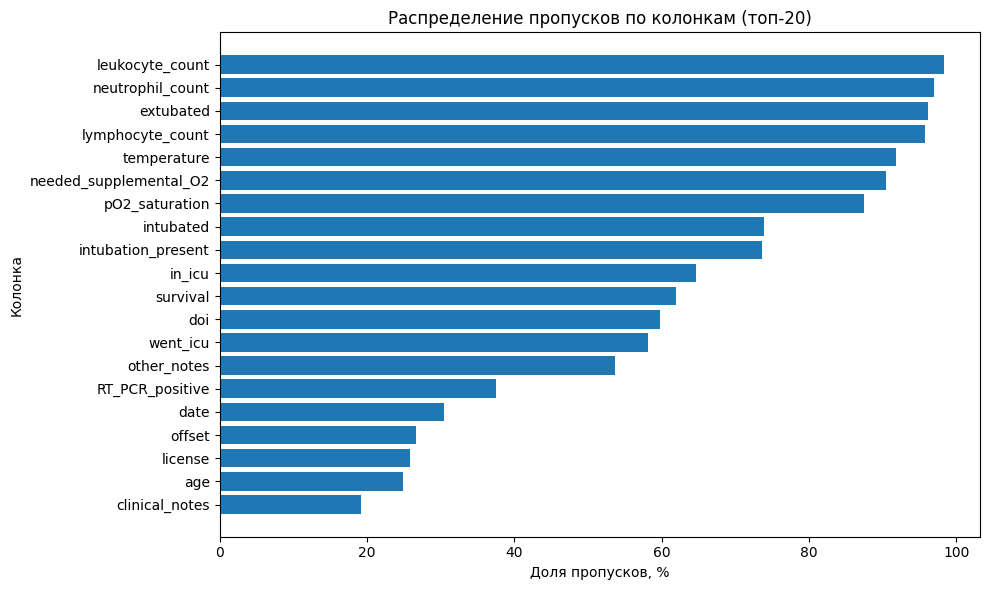

In [48]:
# только колонки, где есть пропуски
plot_df = missing_df_raw[missing_df_raw["MissingPercent"] > 0]

# можно ограничить топ-20, чтобы не было слишком много строк
plot_df = plot_df.head(20)

plt.figure(figsize=(10, 6))
plt.barh(plot_df.index, plot_df["MissingPercent"])
plt.xlabel("Доля пропусков, %")
plt.ylabel("Колонка")
plt.title("Распределение пропусков по колонкам (топ-20)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**присутствуют поля с большим количеством пропусков. удалим их**

In [49]:
cols_to_drop = [
    # почти полностью пустые лабораторные / показатели
    "leukocyte_count",      # 98.32% пропусков
    "neutrophil_count",     # 97.05%
    "lymphocyte_count",     # 95.79%
    "extubated",            # 96.11%
    "temperature",          # 91.79%
    "needed_supplemental_O2", # 90.53%
    "pO2_saturation",       # 87.47% (очень много пропусков)
    # дублирующий статус
    "intubation_present",   # дублирует смысл "intubated"
    # служебные поля
    "doi",                  # ID статьи / источника, для модели не нужен
    "license",              # тип лицензии, служебная инфа
    # свободный текст
    "clinical_notes",
    "other_notes",
]

df_mid = df.drop(*[c for c in cols_to_drop if c in df.columns])

#### Удалённые признаки и причины:


* leukocyte_count, neutrophil_count, lymphocyte_count, extubated, temperature, needed_supplemental_O2, pO2_saturation

→ очень высокая доля пропусков (> 87–98%).

Информации мало, заполнение будет слабым, вклад в модель сомнителен.

* intubation_present

→ дублирует смысл intubated; при наличии одного статуса второй не даёт новой информации.

* doi, license

→ служебные / административные поля (идентификатор публикации, тип лицензии), не несут диагностической или прогностической информации.

* clinical_notes, other_notes

→ свободный текст, требующий отдельного NLP‑pipeline;



**Сохранённые, несмотря на пропуски:**


* intubated, in_icu, went_icu, survival → клинически важные маркеры тяжести и исхода, могут быть полезны даже при неполноте.

* RT_PCR_positive, age, sex, location, date, offset → ключевые клинические и демографические параметры,

In [56]:
numeric_cols = [
    name for name, dtype in df_mid.dtypes
    if dtype in ("int", "bigint", "double", "float", "long")
]

numeric_cols

['offset', 'age', 'is_covid']

In [57]:
if numeric_cols:
    df_mid.select(numeric_cols).summary("count", "mean", "stddev", "min", "max").show()
else:
    print("Числовых колонок нет.")

+-------+-----------------+------------------+------------------+
|summary|           offset|               age|          is_covid|
+-------+-----------------+------------------+------------------+
|  count|              697|               713|               950|
|   mean|9.083213773314204|  53.5343618513324|0.6147368421052631|
| stddev|31.66407673016952|16.949006804228343|0.4869137708495362|
|    min|             -360|                18|                 0|
|    max|              365|                94|                 1|
+-------+-----------------+------------------+------------------+



In [58]:
df_mid_clean = (
    df_mid
    .withColumn(
        "offset_clean",
        F.when((F.col("offset") >= -30) & (F.col("offset") <= 180), F.col("offset"))
         .otherwise(F.lit(None).cast("double"))
    )
    
)

## 4. Data cleaning and preparation

In [66]:
def preprocess_metadata_auto(df: DataFrame) -> DataFrame:
    """
    Автоматическая предобработка метаданных COVID-Xray.

    Шаги:
    - удаление служебных и ненужных колонок
    - удаление полностью дублирующихся строк
    - унификация диагноза finding -> finding_unified + is_covid
    - обработка выбросов offset (capping по перцентилям)
    - автоматическое заполнение пропусков (числовые/строковые)
    - нормализация бинарных флагов (Y/N/UNKNOWN)
    - формирование финального "чистого" датасета без дублей колонок
    """

    # 1. Удаляем заведомо служебные/ненужные колонки, если есть
    cols_to_drop = [
        "_c29",
        "leukocyte_count", "neutrophil_count", "lymphocyte_count",
        "extubated", "temperature", "needed_supplemental_O2", "pO2_saturation",
        "intubation_present",
        "doi", "license",
        "clinical_notes", "other_notes",
    ]
    df = df.drop(*[c for c in cols_to_drop if c in df.columns])

    # 2. Удаляем полностью дублирующиеся строки
    df = df.dropDuplicates()

    # 3. Унифицируем finding -> finding_unified + is_covid
    def unify_finding(finding_raw: str) -> str:
        if finding_raw is None:
            return "unknown"
        f = finding_raw.strip().lower()
        if f == "" or f == "nan":
            return "unknown"

        if "covid" in f:
            return "covid-19"
        if "pneumonia" in f and "covid" not in f:
            return "other pneumonia"
        if "tuberculosis" in f:
            return "tuberculosis"
        if "no finding" in f or "normal" in f:
            return "no finding"

        return "other finding"

    unify_finding_udf = F.udf(unify_finding, StringType())

    if "finding" in df.columns:
        df = df.withColumn("finding", F.trim(F.col("finding").cast("string")))
        df = df.withColumn("finding_unified", unify_finding_udf(F.col("finding")))
        df = df.withColumn(
            "is_covid",
            F.when(F.col("finding_unified") == "covid-19", F.lit(1)).otherwise(F.lit(0))
        )

    # 4. Обработка выбросов для offset
    if "offset" in df.columns:
        # берём 1-й и 99-й перцентили для смягчённого отсечения хвостов
        q1, q99 = df.approxQuantile("offset", [0.01, 0.99], 0.01)
        df = df.withColumn(
            "offset_clean",
            F.when(F.col("offset") < q1, F.lit(float(q1)))
             .when(F.col("offset") > q99, F.lit(float(q99)))
             .otherwise(F.col("offset").cast("double"))
        )

    # 5. Определяем числовые и строковые колонки
    numeric_cols = [
        f.name for f in df.schema.fields
        if isinstance(f.dataType, NumericType)
    ]
    string_cols = [
        f.name for f in df.schema.fields
        if isinstance(f.dataType, StringType)
    ]

    # 5.1. Строковые колонки для заполнения (исключаем ID и явный сервис)
    string_cols_to_fill = [
        c for c in string_cols
        if c not in {"patientid", "filename", "url", "folder"}
    ]

    # 5.2. Числовые колонки для заполнения
    numeric_cols_to_fill = [
        c for c in numeric_cols
        if not c.endswith("_filled")
        and not c.endswith("_clean")
        and c not in {"is_covid"}
    ]

    # 6. Заполнение числовых колонок медианой -> <col>_filled
    for col in numeric_cols_to_fill:
        try:
            median_val = df.approxQuantile(col, [0.5], 0.25)[0]
        except Exception:
            median_val = None

        if median_val is not None:
            df = df.withColumn(
                f"{col}_filled",
                F.when(F.col(col).isNull(), F.lit(float(median_val)))
                 .otherwise(F.col(col).cast("double"))
            )
        else:
            df = df.withColumn(
                f"{col}_filled",
                F.col(col).cast("double")
            )

    # 7. Заполнение строковых колонок модой -> <col>_filled
    for col in string_cols_to_fill:
        mode_row = (
            df.filter(F.col(col).isNotNull())
              .groupBy(col)
              .count()
              .orderBy(F.col("count").desc())
              .first()
        )
        if mode_row is not None:
            mode_val = mode_row[col]
            df = df.withColumn(
                f"{col}_filled",
                F.coalesce(F.col(col), F.lit(mode_val))
            )
        else:
            df = df.withColumn(
                f"{col}_filled",
                F.coalesce(F.col(col), F.lit("UNKNOWN"))
            )

    # 8. Нормализация бинарных флагов -> <col>_norm (Y/N/UNKNOWN)
    def normalize_flag_col(colname: str):
        return (F.when(F.lower(F.col(colname)) == "y", "Y")
                 .when(F.lower(F.col(colname)) == "n", "N")
                 .otherwise("UNKNOWN"))

    for col in ["RT_PCR_positive", "survival", "intubated",
                "went_icu", "in_icu"]:
        if col in df.columns:
            df = df.withColumn(f"{col}_norm", normalize_flag_col(col))

    # 9. Формируем финальный "чистый" датасет без дублей колонок

    cols_to_keep = [
        # ID / связь с картинкой
        "patientid",
        "filename",
        "folder",
        "url",

        # таргет
        "is_covid",

        # числовые фичи
        "age_filled",         # из age
        "offset_clean",       # из offset с обработанными выбросами

        # категориальные фичи
        "sex_filled",
        "finding_unified_filled",
        "RT_PCR_positive_norm",
        "survival_norm",
        "intubated_norm",
        "went_icu_norm",
        "in_icu_norm",
        "view_filled",
        "modality_filled",
        "location_filled",
        "date_filled",
    ]

    # оставляем только реально существующие колонки
    cols_to_keep = [c for c in cols_to_keep if c in df.columns]
    df_clean = df.select(*cols_to_keep)

    # опционально: переименуем для красоты (уберём _filled/_clean из имён)
    rename_map = {
        "age_filled": "age",
        "offset_clean": "offset",
        "sex_filled": "sex",
        "finding_unified_filled": "finding_unified",
        "view_filled": "view",
        "modality_filled": "modality",
        "location_filled": "location",
        "date_filled": "date",
    }
    for old, new in rename_map.items():
        if old in df_clean.columns:
            df_clean = df_clean.withColumnRenamed(old, new)

    return df_clean

In [67]:
df_clean = preprocess_metadata_auto(df_mid_clean)

In [68]:
df_clean.printSchema()

root
 |-- patientid: string (nullable = true)
 |-- filename: string (nullable = true)
 |-- folder: string (nullable = true)
 |-- url: string (nullable = true)
 |-- is_covid: integer (nullable = false)
 |-- age: double (nullable = true)
 |-- offset: double (nullable = true)
 |-- sex: string (nullable = false)
 |-- finding_unified: string (nullable = false)
 |-- RT_PCR_positive_norm: string (nullable = false)
 |-- survival_norm: string (nullable = false)
 |-- intubated_norm: string (nullable = false)
 |-- went_icu_norm: string (nullable = false)
 |-- in_icu_norm: string (nullable = false)
 |-- view: string (nullable = false)
 |-- modality: string (nullable = false)
 |-- location: string (nullable = false)
 |-- date: string (nullable = false)



## 5.SQL-аналитика

In [69]:
df_clean.createOrReplaceTempView("covid_metadata_clean")

In [70]:
df_clean.cache()
df_clean.count()  # прогреваем кеш

950

### 5.1 Базовая статистика по диагнозам

In [71]:
spark.sql("""
SELECT
    finding_unified,
    COUNT(*) AS cnt,
    ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 2) AS pct_of_total,
    AVG(age) AS avg_age,
    MIN(age) AS min_age,
    MAX(age) AS max_age
FROM covid_metadata_clean
GROUP BY finding_unified
ORDER BY cnt DESC
""").show(truncate=False)

25/12/05 16:03:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/12/05 16:03:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/12/05 16:03:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/12/05 16:03:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/12/05 16:03:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/12/05 16:03:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/12/05 1

+---------------+---+------------+-----------------+-------+-------+
|finding_unified|cnt|pct_of_total|avg_age          |min_age|max_age|
+---------------+---+------------+-----------------+-------+-------+
|covid-19       |584|61.47       |52.56335616438356|20.0   |94.0   |
|other pneumonia|242|25.47       |48.37190082644628|18.0   |90.0   |
|other finding  |84 |8.84        |40.0             |40.0   |40.0   |
|no finding     |22 |2.32        |51.18181818181818|22.0   |78.0   |
|tuberculosis   |18 |1.89        |42.27777777777778|20.0   |78.0   |
+---------------+---+------------+-----------------+-------+-------+



### 5. 2. Распределение по полу и диагнозам

In [72]:
spark.sql("""
SELECT
    finding_unified,
    sex,
    COUNT(*) AS cnt,
    ROUND(
        100.0 * COUNT(*) / SUM(COUNT(*)) OVER (PARTITION BY finding_unified),
        2
    ) AS pct_within_diagnosis
FROM covid_metadata_clean
GROUP BY finding_unified, sex
ORDER BY finding_unified, cnt DESC
""").show(truncate=False)

+---------------+---+---+--------------------+
|finding_unified|sex|cnt|pct_within_diagnosis|
+---------------+---+---+--------------------+
|covid-19       |M  |409|70.03               |
|covid-19       |F  |175|29.97               |
|no finding     |M  |12 |54.55               |
|no finding     |F  |10 |45.45               |
|other finding  |M  |61 |72.62               |
|other finding  |F  |23 |27.38               |
|other pneumonia|M  |144|59.50               |
|other pneumonia|F  |98 |40.50               |
|tuberculosis   |M  |13 |72.22               |
|tuberculosis   |F  |5  |27.78               |
+---------------+---+---+--------------------+



### 5.3.Аналитика по возрасту

In [73]:
spark.sql("""
WITH ranked AS (
    SELECT
        finding_unified,
        patientid,
        age,
        ROW_NUMBER() OVER (
            PARTITION BY finding_unified
            ORDER BY age DESC
        ) AS rn
    FROM covid_metadata_clean
    WHERE age IS NOT NULL
)
SELECT
    finding_unified,
    patientid,
    age
FROM ranked
WHERE rn <= 3
ORDER BY finding_unified, age DESC
""").show(truncate=False)

+---------------+---------+----+
|finding_unified|patientid|age |
+---------------+---------+----+
|covid-19       |326b     |94.0|
|covid-19       |324b     |93.0|
|covid-19       |324b     |93.0|
|no finding     |325      |78.0|
|no finding     |315      |78.0|
|no finding     |313b     |75.0|
|other finding  |432      |40.0|
|other finding  |390      |40.0|
|other finding  |430      |40.0|
|other pneumonia|460      |90.0|
|other pneumonia|460      |90.0|
|other pneumonia|91       |80.0|
|tuberculosis   |421      |78.0|
|tuberculosis   |453      |70.0|
|tuberculosis   |456      |58.0|
+---------------+---------+----+



In [113]:
spark.sql("""
SELECT
    age,
    COUNT(*) AS covid_count
FROM covid_metadata_clean
WHERE finding_unified = 'covid-19'
  AND age IS NOT NULL
GROUP BY age
ORDER BY covid_count DESC
LIMIT 3
""").show(truncate=False)

+----+-----------+
|age |covid_count|
+----+-----------+
|40.0|141        |
|70.0|33         |
|50.0|28         |
+----+-----------+



### 5.4 Анализ временных трендов по датам исследований

In [77]:
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

In [78]:
daily_trend = spark.sql("""
WITH parsed AS (
    SELECT
        *,
        COALESCE(
            TO_DATE(date, 'MMMM d, yyyy'),        -- 'January 22, 2020'
            TO_DATE(date, 'MMM d, yyyy'),         -- 'Feb 18, 2020'
            TO_DATE(CONCAT(date, '-01-01'))       -- '2017' -> '2017-01-01'
        ) AS study_date
    FROM covid_metadata_clean
)
SELECT
    study_date,
    is_covid,
    COUNT(*) AS cnt
FROM parsed
WHERE study_date IS NOT NULL
GROUP BY study_date, is_covid
ORDER BY study_date, is_covid
""")

daily_trend.show(truncate=False)

+----------+--------+---+
|study_date|is_covid|cnt|
+----------+--------+---+
|2004-01-01|0       |11 |
|2007-01-01|0       |1  |
|2009-09-10|0       |1  |
|2009-09-16|0       |1  |
|2009-09-21|0       |1  |
|2010-01-01|0       |3  |
|2010-05-04|0       |2  |
|2010-10-08|0       |1  |
|2011-01-01|0       |5  |
|2013-01-01|0       |7  |
|2014-01-01|0       |11 |
|2015-01-01|0       |24 |
|2015-05-10|0       |1  |
|2016-01-01|0       |20 |
|2017-01-01|0       |3  |
|2017-06-05|0       |1  |
|2018-01-01|0       |6  |
|2019-01-01|0       |2  |
|2019-02-26|0       |1  |
|2019-05-09|0       |1  |
+----------+--------+---+
only showing top 20 rows



In [79]:
monthly_trend = spark.sql("""
WITH parsed AS (
    SELECT
        *,
        COALESCE(
            TO_DATE(date, 'MMMM d, yyyy'),
            TO_DATE(date, 'MMM d, yyyy'),
            TO_DATE(CONCAT(date, '-01-01'))
        ) AS study_date
    FROM covid_metadata_clean
)
SELECT
    DATE_TRUNC('month', study_date) AS month,
    is_covid,
    COUNT(*) AS cnt
FROM parsed
WHERE study_date IS NOT NULL
GROUP BY DATE_TRUNC('month', study_date), is_covid
ORDER BY month, is_covid
""")

monthly_trend.show(truncate=False)

+-------------------+--------+---+
|month              |is_covid|cnt|
+-------------------+--------+---+
|2004-01-01 00:00:00|0       |11 |
|2007-01-01 00:00:00|0       |1  |
|2009-09-01 00:00:00|0       |3  |
|2010-01-01 00:00:00|0       |3  |
|2010-05-01 00:00:00|0       |2  |
|2010-10-01 00:00:00|0       |1  |
|2011-01-01 00:00:00|0       |5  |
|2013-01-01 00:00:00|0       |7  |
|2014-01-01 00:00:00|0       |11 |
|2015-01-01 00:00:00|0       |24 |
|2015-05-01 00:00:00|0       |1  |
|2016-01-01 00:00:00|0       |20 |
|2017-01-01 00:00:00|0       |3  |
|2017-06-01 00:00:00|0       |1  |
|2018-01-01 00:00:00|0       |6  |
|2019-01-01 00:00:00|0       |2  |
|2019-02-01 00:00:00|0       |1  |
|2019-05-01 00:00:00|0       |1  |
|2019-12-01 00:00:00|1       |4  |
|2020-01-01 00:00:00|0       |250|
+-------------------+--------+---+
only showing top 20 rows



In [ ]:
print("РАСПРЕДЕЛЕНИЕ ТИПОВ ЗАБОЛЕВАНИЙ ПО ГОДАМ")
print("=" * 60)

query_by_year = """
WITH parsed AS (
    SELECT
        *,
        COALESCE(
            TO_DATE(date, 'MMMM d, yyyy'),       
            TO_DATE(date, 'MMM d, yyyy'),         
            TO_DATE(CONCAT(date, '-01-01'))      
        ) AS study_date
    FROM covid_metadata_clean
)
SELECT
    YEAR(study_date) AS year,          -- год исследования
    finding_unified,                   -- диагноз
    COUNT(*) AS cases_count,           -- сколько случаев этого диагноза в этом году
    SUM(COUNT(*)) OVER (PARTITION BY YEAR(study_date)) AS total_cases_per_year
                                       -- всего случаев (все диагнозы) в этом году
FROM parsed
WHERE study_date IS NOT NULL
GROUP BY YEAR(study_date), finding_unified
ORDER BY year, cases_count DESC
"""

result_year = spark.sql(query_by_year)
print(f"Всего записей с известным годом: {result_year.count()}")
result_year.show(50, truncate=False)

РАСПРЕДЕЛЕНИЕ ТИПОВ ЗАБОЛЕВАНИЙ ПО ГОДАМ


Всего записей с известным годом: 19
+----+---------------+-----------+--------------------+
|year|finding_unified|cases_count|total_cases_per_year|
+----+---------------+-----------+--------------------+
|2004|other pneumonia|11         |11                  |
|2007|other pneumonia|1          |1                   |
|2009|other pneumonia|3          |3                   |
|2010|other pneumonia|6          |6                   |
|2011|other pneumonia|5          |5                   |
|2013|other pneumonia|7          |7                   |
|2014|other pneumonia|11         |11                  |
|2015|other pneumonia|25         |25                  |
|2016|other pneumonia|20         |20                  |
|2017|other pneumonia|4          |4                   |
|2018|other pneumonia|6          |6                   |
|2019|covid-19       |4          |8                   |
|2019|no finding     |2          |8                   |
|2019|other pneumonia|2          |8                   |
|2020|covid-

### 5.5 Распределение по проекциям (view)


In [80]:
views_stats = spark.sql("""
SELECT
    view,
    COUNT(*) AS cnt,
    ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 2) AS pct_of_total
FROM covid_metadata_clean
GROUP BY view
ORDER BY cnt DESC
""")

views_stats.show(truncate=False)

25/12/05 17:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/12/05 17:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/12/05 17:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/12/05 17:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/12/05 17:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/12/05 17:19:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/12/05 1

+---------+---+------------+
|view     |cnt|pct_of_total|
+---------+---+------------+
|PA       |344|36.21       |
|AP Supine|234|24.63       |
|AP       |203|21.37       |
|L        |84 |8.84        |
|Axial    |68 |7.16        |
|Coronal  |16 |1.68        |
|AP Erect |1  |0.11        |
+---------+---+------------+



## 6.Обработка в PySpark

### 6.1 UDF для категоризации возраста

In [81]:
def age_category(age: float) -> str:
    if age is None:
        return "unknown"
    try:
        a = float(age)
    except Exception:
        return "unknown"

    if a < 0:
        return "unknown"
    if a < 18:
        return "child"
    if a < 40:
        return "young_adult"
    if a < 60:
        return "middle_aged"
    return "senior"

age_category_udf = F.udf(age_category, StringType())

df_with_age_cat = df_clean.withColumn(
    "age_group",
    age_category_udf(F.col("age"))
)

df_with_age_cat.select("age", "age_group").show(10, truncate=False)

+----+-----------+
|age |age_group  |
+----+-----------+
|61.0|senior     |
|55.0|middle_aged|
|43.0|middle_aged|
|78.0|senior     |
|72.0|senior     |
|74.0|senior     |
|40.0|middle_aged|
|40.0|middle_aged|
|70.0|senior     |
|40.0|middle_aged|
+----+-----------+
only showing top 10 rows



In [82]:
spark.sql("""
SELECT age_group, COUNT(*) AS cnt
FROM (
    SELECT
        age,
        CASE
            WHEN age IS NULL OR age < 0 THEN 'unknown'
            WHEN age < 18 THEN 'child'
            WHEN age < 40 THEN 'young_adult'
            WHEN age < 60 THEN 'middle_aged'
            ELSE 'senior'
        END AS age_group
    FROM covid_metadata_clean
)
GROUP BY age_group
ORDER BY cnt DESC
""").show(truncate=False)

+-----------+---+
|age_group  |cnt|
+-----------+---+
|middle_aged|499|
|senior     |293|
|young_adult|158|
+-----------+---+



## 6.2 Унификация диагнозов

In [83]:
def unify_finding_raw(finding_raw: str) -> str:
    if finding_raw is None:
        return "unknown"
    f = finding_raw.strip().lower()
    if f == "" or f == "nan":
        return "unknown"

    if "covid" in f:
        return "covid-19"
    if "sars" in f and "covid" not in f:
        return "sars"
    if "mers" in f:
        return "mers"
    if "pneumonia" in f and "covid" not in f:
        return "other pneumonia"
    if "tuberculosis" in f:
        return "tuberculosis"
    if "bacterial" in f:
        return "bacterial pneumonia"
    if "fungal" in f:
        return "fungal pneumonia"
    if "no finding" in f or "normal" in f:
        return "no finding"
    return "other finding"

unify_finding_udf = F.udf(unify_finding_raw, StringType())

In [ ]:
if "finding" in df_clean.columns:
    df_diag = df_clean.withColumn(
        "finding_category",
        unify_finding_udf(F.col("finding"))
    )
else:
    # если оставили только finding_unified ранее, можно переименовать
    df_diag = df_clean.withColumnRenamed("finding_unified", "finding_category")

df_diag.select("finding_category").groupBy("finding_category").count().show(truncate=False)

+----------------+-----+
|finding_category|count|
+----------------+-----+
|covid-19        |584  |
|other pneumonia |242  |
|other finding   |84   |
|tuberculosis    |18   |
|no finding      |22   |
+----------------+-----+



In [85]:
df_diag = df_diag.withColumn(
    "is_covid",
    F.when(F.col("finding_category") == "covid-19", F.lit(1)).otherwise(F.lit(0))
)

### 6.3 Базовая фильтрация данных

In [90]:
df_filtered = (
    df_diag
    .filter(F.col("age") >= 0)
    .filter(F.col("sex").isin("M", "F"))          # если именно такие значения
    .filter(F.col("modality") == "X-ray")
    .filter(F.col("view").isin("PA", "AP", "AP Supine"))
)

df_filtered.printSchema()
print("Rows before:", df_diag.count(), " after filter:", df_filtered.count())

root
 |-- patientid: string (nullable = true)
 |-- filename: string (nullable = true)
 |-- folder: string (nullable = true)
 |-- url: string (nullable = true)
 |-- is_covid: integer (nullable = false)
 |-- age: double (nullable = true)
 |-- offset: double (nullable = true)
 |-- sex: string (nullable = false)
 |-- finding_category: string (nullable = false)
 |-- RT_PCR_positive_norm: string (nullable = false)
 |-- survival_norm: string (nullable = false)
 |-- intubated_norm: string (nullable = false)
 |-- went_icu_norm: string (nullable = false)
 |-- in_icu_norm: string (nullable = false)
 |-- view: string (nullable = false)
 |-- modality: string (nullable = false)
 |-- location: string (nullable = false)
 |-- date: string (nullable = false)

Rows before: 950  after filter: 781


###  6.4 Сохранение результатов в оптимизированном формате

In [92]:
output_path = "data/processed/covid_metadata_clean_parquet_part"

(
    df_filtered
    .write
    .mode("overwrite")
    .partitionBy("is_covid")
    .parquet(output_path)
)

25/12/06 12:37:08 WARN MemoryManager: Total allocation exceeds 95,00% (1 020 054 720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
25/12/06 12:37:08 WARN MemoryManager: Total allocation exceeds 95,00% (1 020 054 720 bytes) of heap memory
Scaling row group sizes to 84,44% for 9 writers
25/12/06 12:37:08 WARN MemoryManager: Total allocation exceeds 95,00% (1 020 054 720 bytes) of heap memory
Scaling row group sizes to 76,00% for 10 writers
25/12/06 12:37:08 WARN MemoryManager: Total allocation exceeds 95,00% (1 020 054 720 bytes) of heap memory
Scaling row group sizes to 69,09% for 11 writers
25/12/06 12:37:08 WARN MemoryManager: Total allocation exceeds 95,00% (1 020 054 720 bytes) of heap memory
Scaling row group sizes to 63,33% for 12 writers
25/12/06 12:37:08 WARN MemoryManager: Total allocation exceeds 95,00% (1 020 054 720 bytes) of heap memory
Scaling row group sizes to 58,46% for 13 writers
25/12/06 12:37:08 WARN MemoryManager: Total allocation exceeds 95,

In [93]:
df_ready = spark.read.parquet(output_path)
df_ready.printSchema()
df_ready.show(5, truncate=False)
print("Rows:", df_ready.count())

root
 |-- patientid: string (nullable = true)
 |-- filename: string (nullable = true)
 |-- folder: string (nullable = true)
 |-- url: string (nullable = true)
 |-- age: double (nullable = true)
 |-- offset: double (nullable = true)
 |-- sex: string (nullable = true)
 |-- finding_category: string (nullable = true)
 |-- RT_PCR_positive_norm: string (nullable = true)
 |-- survival_norm: string (nullable = true)
 |-- intubated_norm: string (nullable = true)
 |-- went_icu_norm: string (nullable = true)
 |-- in_icu_norm: string (nullable = true)
 |-- view: string (nullable = true)
 |-- modality: string (nullable = true)
 |-- location: string (nullable = true)
 |-- date: string (nullable = true)
 |-- is_covid: integer (nullable = true)

+---------+------------------------------------------------------------+------+-----------------------------------------------------------------------------------------+----+------+---+----------------+--------------------+-------------+--------------+--------

## 7. Visualisaion

### 7.1 Круговая диаграмма распределения диагнозов

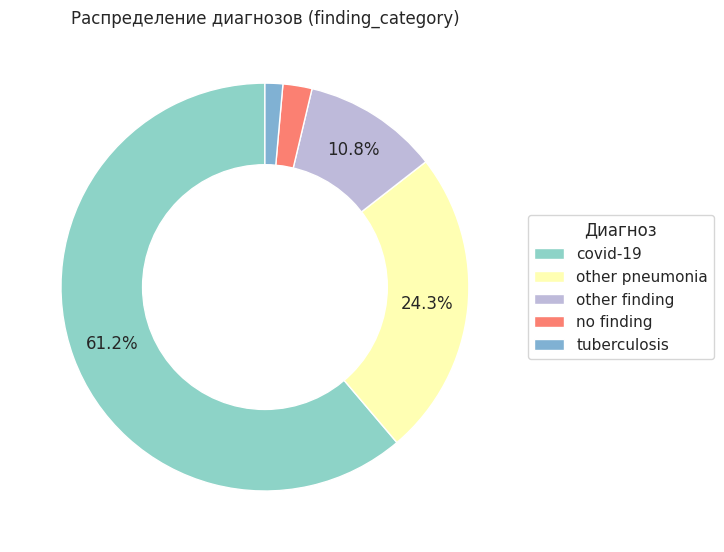

In [ ]:
diag_stats = (
    df_ready
    .groupBy("finding_category")
    .count()
    .toPandas()
    .sort_values("count", ascending=False)
)

values = diag_stats["count"].values
labels = diag_stats["finding_category"].values

# функция для подписей: не показывать мелкие проценты
def autopct_func(pct):
    return f"{pct:.1f}%" if pct >= 3 else ""

plt.figure(figsize=(7, 6))
colors = sns.color_palette("Set3", n_colors=len(values))

wedges, texts, autotexts = plt.pie(
    values,
    labels=None,              # без подписей на самих секторах
    autopct=autopct_func,     
    pctdistance=0.8,
    startangle=90,
    colors=colors
)

# пончик
centre_circle = plt.Circle((0, 0), 0.60, fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# легенда со всеми диагнозами
plt.legend(
    wedges,
    labels,
    title="Диагноз",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("Распределение диагнозов (finding_category)")
plt.tight_layout()
plt.show()

### 7.2 Столбчатая диаграмма по возрастным группам


/tmp/ipykernel_1515740/2580319610.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


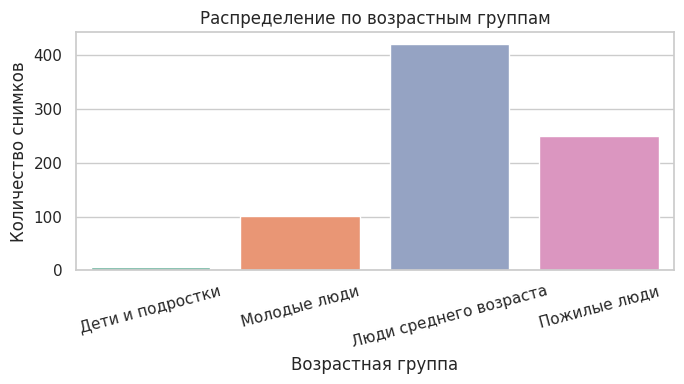

In [ ]:
from pyspark.sql import functions as F

age_group_df = (
    df_ready
    .withColumn(
        "age_group_ru",
        F.when(F.col("age") < 21, "Дети и подростки")
         .when(F.col("age") < 40, "Молодые люди")
         .when(F.col("age") < 60, "Люди среднего возраста")
         .otherwise("Пожилые люди")
    )
)

age_group_stats = (
    age_group_df
    .groupBy("age_group_ru")
    .count()
    .toPandas()
)

# порядок и 4 группы
order = [
    "Дети и подростки",
    "Молодые люди",
    "Люди среднего возраста",
    "Пожилые люди"
]

age_group_stats = (
    age_group_stats
    .set_index("age_group_ru")
    .reindex(order, fill_value=0)
    .reset_index()
)

plt.figure(figsize=(7, 4))
sns.barplot(
    data=age_group_stats,
    x="age_group_ru",
    y="count",
    palette="Set2"
)
plt.title("Распределение по возрастным группам")
plt.xlabel("Возрастная группа")
plt.ylabel("Количество снимков")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

**Только для диагноза COVID**

/tmp/ipykernel_1515740/862098859.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


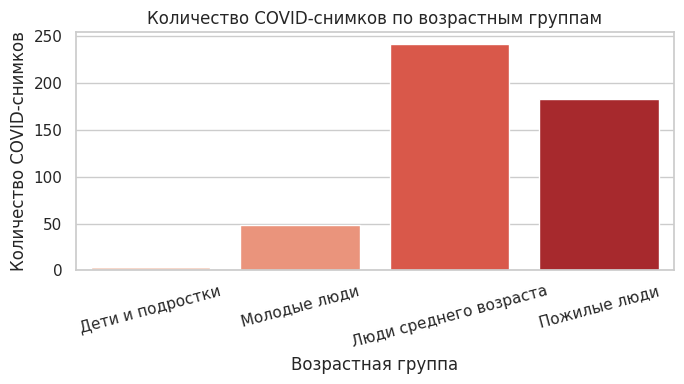

In [ ]:
# считаем только COVID-снимки
covid_age_stats = (
    age_group_df
    .filter(F.col("is_covid") == 1)
    .groupBy("age_group_ru")
    .count()
    .toPandas()
)

order = [
    "Дети и подростки",
    "Молодые люди",
    "Люди среднего возраста",
    "Пожилые люди"
]

covid_age_stats = (
    covid_age_stats
    .set_index("age_group_ru")
    .reindex(order, fill_value=0)
    .reset_index()
)

plt.figure(figsize=(7, 4))
sns.barplot(
    data=covid_age_stats,
    x="age_group_ru",
    y="count",
    palette="Reds"
)
plt.title("Количество COVID-снимков по возрастным группам")
plt.xlabel("Возрастная группа")
plt.ylabel("Количество COVID-снимков")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [110]:
df_ready.select(
    F.min("age").alias("min_age"),
    F.max("age").alias("max_age"),
    F.round(F.mean("age"), 0).cast("int").alias("mean_age_rounded"),
    F.mode("age").alias("mode_age")
).show()

+-------+-------+----------------+--------+
|min_age|max_age|mean_age_rounded|mode_age|
+-------+-------+----------------+--------+
|   18.0|   94.0|              51|    40.0|
+-------+-------+----------------+--------+



### 7.3 График временных трендов исследований


In [97]:
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")
df_ready.createOrReplaceTempView("covid_ready")

monthly_trend = spark.sql("""
WITH parsed AS (
    SELECT
        *,
        COALESCE(
            TO_DATE(date, 'MMMM d, yyyy'),
            TO_DATE(date, 'MMM d, yyyy'),
            TO_DATE(CONCAT(date, '-01-01'))
        ) AS study_date
    FROM covid_ready
)
SELECT
    DATE_TRUNC('month', study_date) AS month,
    is_covid,
    COUNT(*) AS cnt
FROM parsed
WHERE study_date IS NOT NULL
GROUP BY DATE_TRUNC('month', study_date), is_covid
ORDER BY month, is_covid
""")

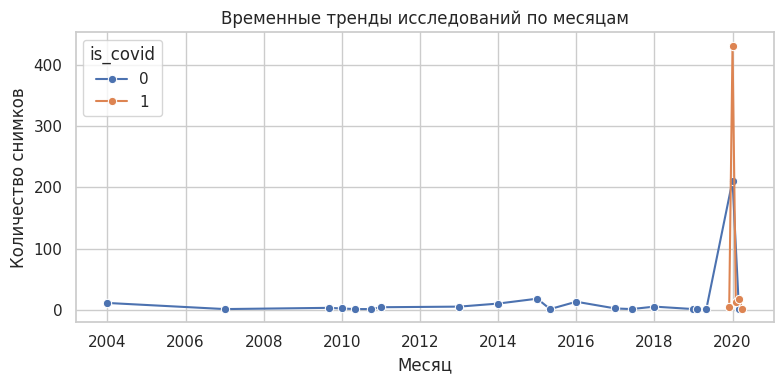

In [98]:
monthly_trend_pdf = monthly_trend.toPandas()
monthly_trend_pdf["month"] = pd.to_datetime(monthly_trend_pdf["month"])

plt.figure(figsize=(8, 4))
sns.lineplot(
    data=monthly_trend_pdf,
    x="month",
    y="cnt",
    hue="is_covid",
    marker="o"
)
plt.title("Временные тренды исследований по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Количество снимков")
plt.legend(title="is_covid")
plt.tight_layout()
plt.show()

### 7.4 Heatmap: диагнозы × проекции (view)

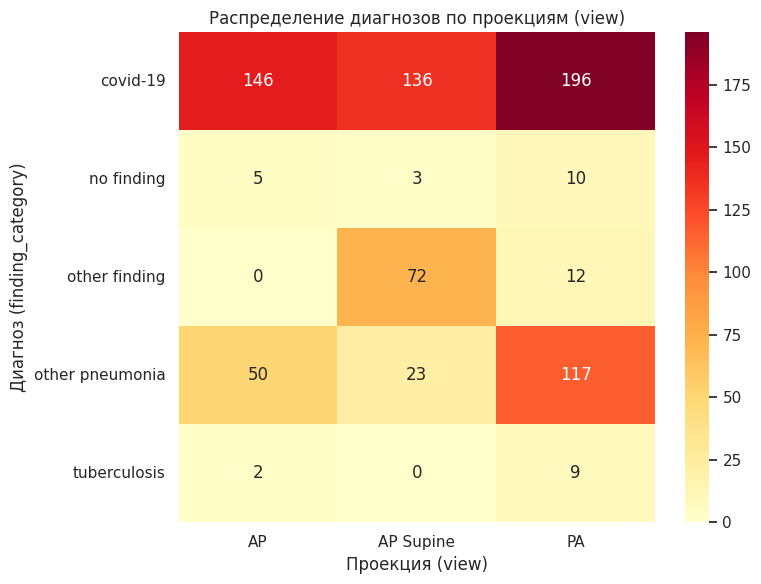

In [99]:
view_diag_stats = (
    df_ready
    .groupBy("view", "finding_category")
    .count()
    .toPandas()
)

pivot = view_diag_stats.pivot(
    index="finding_category",
    columns="view",
    values="count"
).fillna(0)

plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd"
)
plt.title("Распределение диагнозов по проекциям (view)")
plt.xlabel("Проекция (view)")
plt.ylabel("Диагноз (finding_category)")
plt.tight_layout()
plt.show()

# Итоговые выводы и проблемы датасета COVID-Xray

## 1. Основные выводы по данным

- **Структура диагнозов.**  
  Данные существенно смещены в сторону класса `covid-19`: это более половины всей выборки. Остальные диагнозы (`other pneumonia`, `tuberculosis`, `no finding`, `other finding`) встречаются реже, часть из них — заметно недопредставлены. Это важно учитывать при анализе и обучении моделей.

- **Возрастной профиль пациентов.**  
  Большинство пациентов — люди среднего и пожилого возраста. Молодые взрослые присутствуют, но их доля меньше.  
  Для респираторных заболеваний это ожидаемо, но модели будут в первую очередь «заточены» под типичные случаи у людей 40+ лет, а редкие молодые пациенты могут распознаваться хуже.

- **Половой состав.**  
  Во всех диагностических группах наблюдается перекос в сторону мужчин. Особенно заметно это для `covid-19`, туберкулёза и «прочих находок», где доля мужчин около 70%.  
  Это создаёт риск гендерного смещения: модель может хуже обобщаться на женщин.

- **Временное распределение и тренды.**  
  - До 2019 года в датасете представлены в основном случаи «другой пневмонии», COVID-19 отсутствует.  
  - В 2019 году появляются первые единичные случаи COVID.  
  - Основной объём данных (и по COVID, и по другим диагнозам) относится к 2020 году — периоду активной пандемии.  
  Таким образом, данные сильно неравномерны во времени, и 2020 год доминирует по числу наблюдений.

---

## 2. Основные проблемы и ограничения

- **Дисбаланс классов.**  
  Класс `covid-19` заметно преобладает над остальными, а некоторые диагнозы (например, туберкулёз или «нет находок») представлены очень мало. Это:
  - усложняет обучение моделей, устойчивых для всех классов;
  - приводит к риску игнорирования редких диагнозов и завышенных метрик за счёт «главного» класса.

- **Гендерный и возрастной bias.**  
  Явный перекос в сторону:
  - мужчин;
  - пациентов среднего и пожилого возраста.  
  В результате модели могут хуже работать на женщинах и более молодых пациентах, так как таких примеров просто меньше в данных.

- **Временной bias и неравномерность по годам.**  
  До 2020 года COVID-случаев практически нет, затем следует резкий всплеск. Это значит, что:
  - модель может частично «узнавать год» или особенности источников (оборудование, протоколы), а не только медицинские признаки;
  - при разбиении на train/test важно учитывать время, чтобы избежать утечки информации и слишком оптимистичных оценок.

- **Пропуски и «грязные» значения.**  
  В исходных данных много:
  - пропусков в числовых полях (возраст, offset и др.);
  - пустых строк и псевдозначений (`""`, `nan`) в категориальных полях;
  - различных написаний одних и тех же диагнозов и значений флагов (`Y/N`, `y/n`, пусто и т.п.).  
  Всё это требовало нормализации, унификации и заполнения, иначе статистика и модели были бы некорректны.

- **Выбросы и неточность дат.**  
  - В поле `offset` встречаются аномально большие положительные и отрицательные значения, которые искажают распределения и могут негативно влиять на модели.  
  - Для части записей указаны только годы без точной даты (например, `2015`), которые при парсинге превращаются в `2015-01-01`. Это значит, что временной анализ по дням/месяцам имеет ограниченную точность.

- **Служебные и нерелевантные признаки.**  
  В датасете присутствуют:
  - технические поля (`_c29`, пути к файлам, URL и т.п.);
  - библиографические и лицензионные поля (`doi`, `license`);
  - разреженные текстовые описания (`clinical_notes`, `other_notes`).  
  Они полезны для организации данных и, возможно, для отдельного текстового анализа, но не подходят напрямую как признаки для базовых табличных моделей без доп. обработки.

---